# Introduction

## Feature Slection vs Feature Extraction 

Dimensionality Reduction에는 2가지 종류의 스킬이 있습니다. 

1. Feature Selection: original features의 일부분 (subset)을 선택합니다. 
2. Feature Extraction: original features에서 중요한 정보를 꺼내서 **새로운** feature subspace를 만듭니다.

<img src="images/selection_vs_extraction.png">

기본적으로 Feature Selection은 4가지가 있습니다. 

1. **Sequential Foward Selection (SFS)**
2. **Sequential Backward Selection (SBS)**
3. **Sequential Floating Forward Selection (SFFS)**
4. **Sequential Floating Backward Selection (SFBS)**

## Sequential Feature Selection Algorithm

Sequential Feature Selection Algorithm은 greedy search algorithm으로서 <br>
d-dimensional feature space를 k-dimensional feature subspace로 바꿔줍니다. <br>
이때 k < d 라는 조건을 갖습니다.

<span class="text-danger">특히 regularization을 지원하지 않는 알고리즘에 사용이 될 수 있는 장점이 있습니다. </span>

특히 Model이 overfitting을 겪을 경우, Sequential Backward Selection (SBS)같은 알고리즘이.. <br>
간혹 prediction수치 자체를 높이는 경우도 있습니다.


### Feature Selection Definition

$ X = \{ x_i\; |\; i=1...N \} $ 이 주어졌을때 subset $ Y_M = \{ x_{i_1}, x_{i_2}, ..., x_{i_M} \} $ 을 찾습니다. <br>
이때 $ M < N $ 이며 $ x_i \in  X $ 입니다.

$$ \begin{bmatrix} x_1 \\ x_2 \\ . \\ . \\ . \\ x_N \end{bmatrix} \rightarrow feature\ selection \rightarrow \begin{bmatrix} x_{i_1} \\ x_{i_2} \\ \\ x_{i_M}  \end{bmatrix} $$

# Sequential Backward Selection (SBS)

SBS알고리즘은 지정한 갯수의 features들을 뽑을때까지 계속 feature를 지워나가는 형태입니다. <br>
이를 위해서 **Criterion function J**를 정의해야 합니다. 


**Input:** <br>
$ X_d $ 에서 d값은 전체 the dimensionality of the full feature space를 나타냅니다.

**Output:**<br>
$ X_k $ 에서 k값은 subset feature의 갯수 이며, $ k < d $ 입니다.

**Initialization**<br>
$ k = d $ 로 시작을 합니다.

**Execution**<br>
특정 feature $ x^- $ 지정하고 criterion function J통해서 가장 적은 performance(accurace)를 보이는 feature를 삭제 합니다.<br>
즉 하나하나씩 각각의 feature들을 다 돌아보며.. 가장 적게 accuracy를 보이는 녀석을 1개씩 삭제시켜나가는 것입니다. 

$$ x^- = argmax\ J(X_k -x) $$

criterion function J를 maximize

In [64]:
%pylab inline
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from itertools import combinations

# Set Random Seed
np.random.seed(1)

Populating the interactive namespace from numpy and matplotlib


## Wine Data

* [https://archive.ics.uci.edu/ml/datasets/Wine](https://archive.ics.uci.edu/ml/datasets/Wine)


1. Alcohol 
2. Malic acid 
3. Ash 
4. Alcalinity of ash 
5. Magnesium 
6. Total phenols 
7. Flavanoids 
8. Nonflavanoid phenols 
9. Proanthocyanins 
10. Color intensity 
11. Hue 
12. OD280/OD315 of diluted wines 
13. Proline 


**Classes**

1. class 1: 59
2. class 2: 71
3. class 3: 48


In [194]:
data = pd.read_csv('../../data/wine/wine_data.csv')

COLUMNS = data.columns
X = data.iloc[:, 1:]
Y = data.iloc[:, :1]

# Standardization 
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split Train and Test Data
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=1)
train_Y = train_Y.get_values().reshape(-1)
test_Y = test_Y.get_values().reshape(-1)

print('Train X:', train_X.shape)
print('Train Y:', train_Y.shape)
print('Test  X:', test_X.shape)
print('Test  Y:', test_Y.shape)

Train X: (133, 13)
Train Y: (133,)
Test  X: (45, 13)
Test  Y: (45,)


### Sequential Backward Selection

In [158]:
class SequentialBackwardSelection(object):
    def __init__(self, model, k):
        """
        @param model: a model to optimize
        @param k <int>: the number of output features to be reduced. 
        """
        self.model = model
        self.k = k
        
        self.dims = []
        self.scores = []
        self.subsets = []
    
    def fit(self, dataset):
        assert 4 == len(dataset)
        
        dim = X.shape[1]
        indices = tuple(range(dim))
        
        score = self.calculate_score(dataset, indices)
        
        self.dims.append(dim)
        self.scores.append(score)
        self.subsets.append(indices)
        
        while dim > self.k:
            scores = []
            subsets = []
            for p in combinations(indices, r=dim-1):
                score = self.calculate_score(dataset, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            indices = subsets[best]
            dim -= 1
            
            self.dims.append(dim)
            self.scores.append(scores[best])
            self.subsets.append(indices)
        
    def calculate_score(self, dataset, indices):
        _X, _Y, test_X, test_Y = dataset
        knn.fit(_X[:, indices], _Y)
        y_preds = knn.predict(test_X[:, indices])
        score = accuracy_score(test_Y, y_preds)
        return score
                                                                                                                                        

knn = KNeighborsClassifier(n_neighbors=2)
sbs = SequentialBackwardSelection(knn, k=1)
sbs.fit([train_X, train_Y, test_X, test_Y])

### K-feature값에 따른 Accuracy의 변화량

아래의 결과에 따르면 K-feature값이 5 Ehsms 6일때 full features일때보다 더 높은 Accuracy를 보였습니다. 


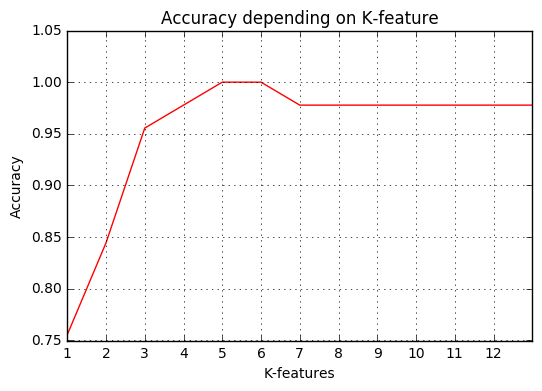

In [155]:
title('Accuracy depending on K-feature')
xticks(range(13))
xlabel('K-features')
ylabel('Accuracy')
plot(sbs.dims, sbs.scores, color='red')
grid()

### 가장 높은 ACCURACY를 보이는 features값들

더 높아지는 이유는 accuracy에 noise를 주거나 상관없는 값들을 없애면서 생기는 현상입니다. 

In [218]:
max_index = np.argmax(sbs.scores)
max_subset = sbs.subsets[max_index]
max_subset = list(max_subset)
best_subset = COLUMNS[1:][max_subset].tolist()

print('Best Accuracy:', sbs.scores[max_index])
print(best_subset)

Best Accuracy: 1.0
['Alcohol', 'Ash', 'Alcalinity of ash', 'Flavanoids', 'Proanthocyanins', 'Hue']
